In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [4]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
target = data['left']

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
stay_df = data[data.left == 0] # dataframe of all employees who stayed
left_df = data[data.left == 1] # dataframe of all employees who left

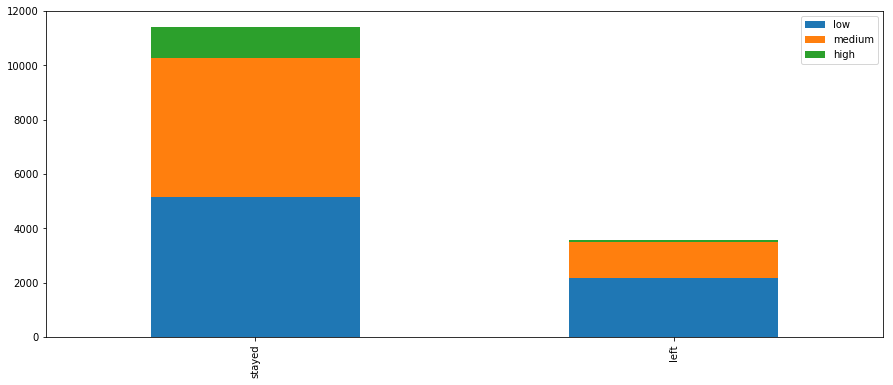

In [11]:
stay_salary = stay_df.salary.value_counts() 
left_salary = left_df.salary.value_counts()

sal_df = pd.DataFrame([stay_salary, left_salary])
sal_df.index = ['stayed', 'left']
sal_df.plot(kind = 'bar', stacked = True, figsize = (15, 6));

In [12]:
print data.sales.unique()

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


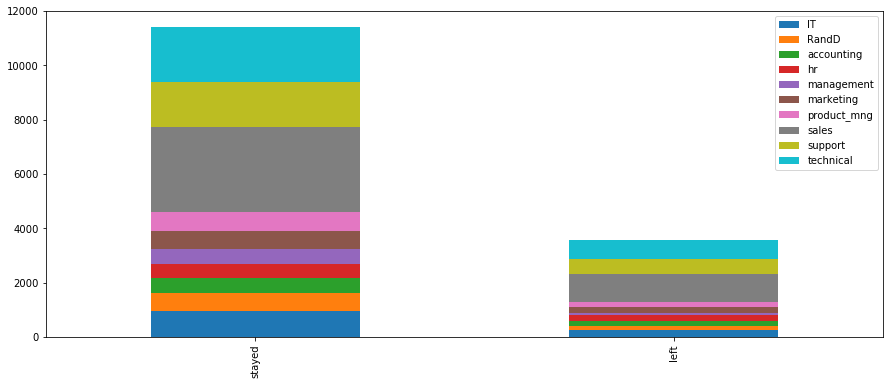

In [14]:
stay_dept = stay_df.sales.value_counts()
left_dept = left_df.sales.value_counts()

dept_df = pd.DataFrame([stay_dept, left_dept])
dept_df.index = ['stayed', 'left']
dept_df.plot(kind = 'bar', stacked = True, figsize = (15, 6));

I don't think the employee's department had a role in whether the employee left or not.  The proportions of the departments among the employees who stayed is pretty similar to the proportions of the departments among the employees who left.  

In [20]:
def perc(feat1, feat2):
    """
    Prints and plots the percentiles.
    """
    perc_df = data[[feat1, feat2]].groupby([feat1], as_index = False).mean()
    
    print perc_df
    
    sns.barplot(x = feat1, y = feat2, data = perc_df)

   left  satisfaction_level
0     0            0.666810
1     1            0.440098


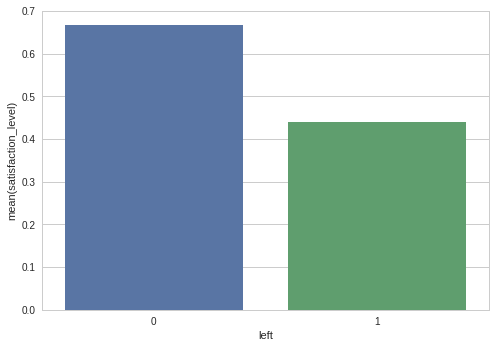

In [21]:
perc('left', 'satisfaction_level')

   left  last_evaluation
0     0         0.715473
1     1         0.718113


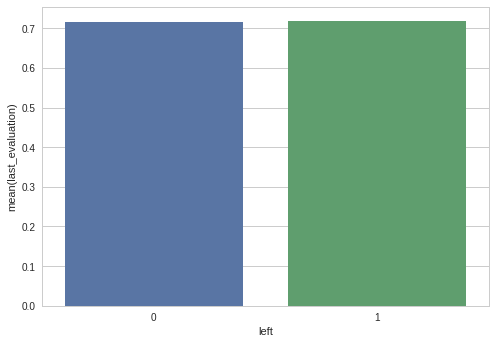

In [28]:
perc('left', 'last_evaluation')

   left  number_project
0     0        3.786664
1     1        3.855503


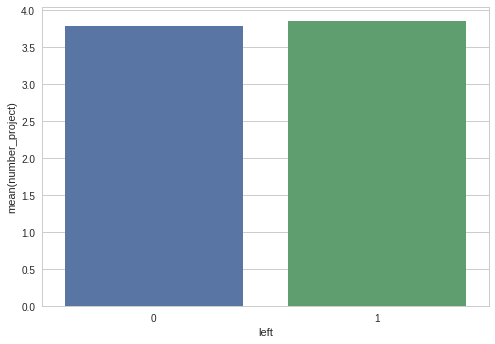

In [29]:
perc('left', 'number_project')

   left  average_montly_hours
0     0            199.060203
1     1            207.419210


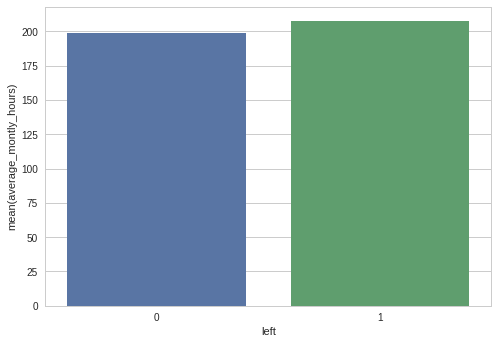

In [30]:
perc('left', 'average_montly_hours')

   left  time_spend_company
0     0            3.380032
1     1            3.876505


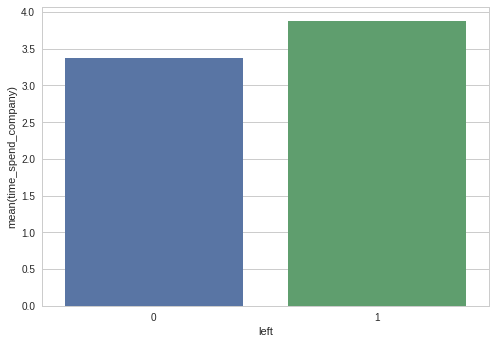

In [31]:
perc('left', 'time_spend_company')

   left  Work_accident
0     0       0.175009
1     1       0.047326


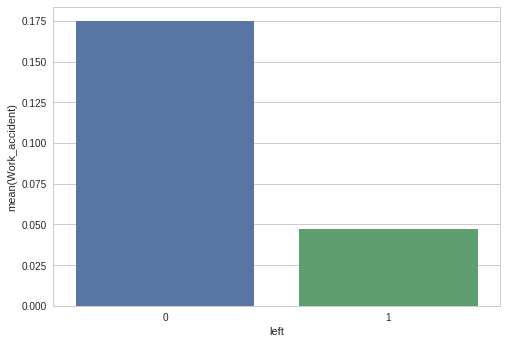

In [32]:
perc('left', 'Work_accident')

   left  promotion_last_5years
0     0               0.026251
1     1               0.005321


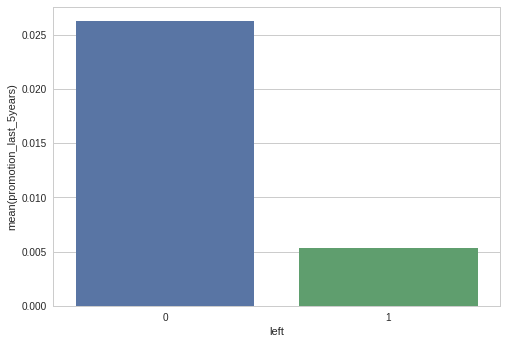

In [33]:
perc('left', 'promotion_last_5years')

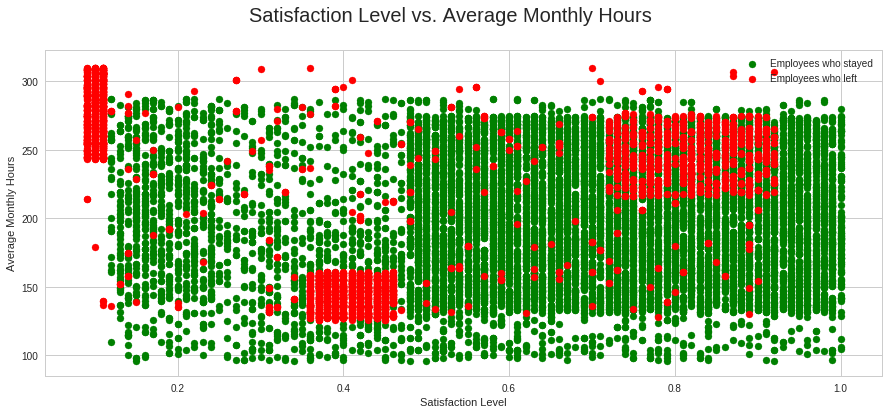

In [36]:
# scatterplot of satisfaction level of those who stayed and of those who left
fig = plt.figure(figsize = (15, 6));

plt.suptitle('Satisfaction Level vs. Average Monthly Hours', fontsize = 20);
plt.scatter(stay_df.satisfaction_level, stay_df.average_montly_hours, c = 'green');
plt.scatter(left_df.satisfaction_level, left_df.average_montly_hours, c = 'red');
plt.xlabel('Satisfaction Level');
plt.ylabel('Average Monthly Hours');
plt.legend(('Employees who stayed', 'Employees who left'), loc = 'upper right');

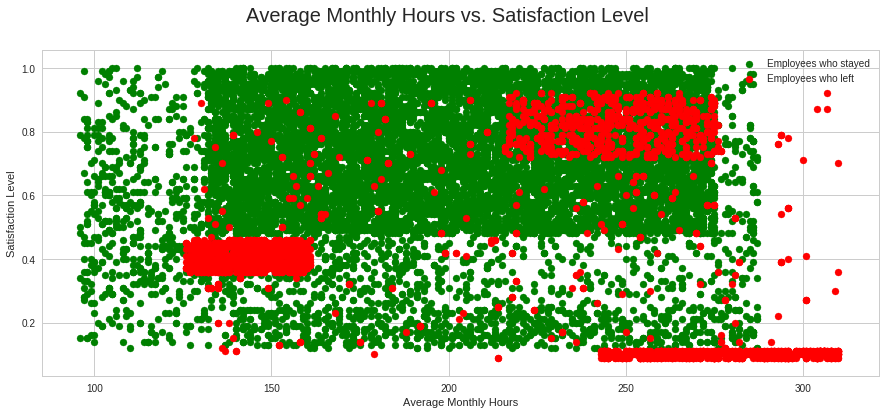

In [42]:
# scatterplot of satisfaction level of those who stayed and of those who left
fig = plt.figure(figsize = (15, 6));

plt.suptitle('Average Monthly Hours vs. Satisfaction Level', fontsize = 20);
plt.scatter(stay_df.average_montly_hours, stay_df.satisfaction_level, c = 'green');
plt.scatter(left_df.average_montly_hours, left_df.satisfaction_level, c = 'red');
plt.xlabel('Average Monthly Hours');
plt.ylabel('Satisfaction Level');
plt.legend(('Employees who stayed', 'Employees who left'), loc = 'upper right');

   number_project  satisfaction_level
0               2            0.478769
1               3            0.687670
2               4            0.695132
3               5            0.678888
4               6            0.273458
5               7            0.118711


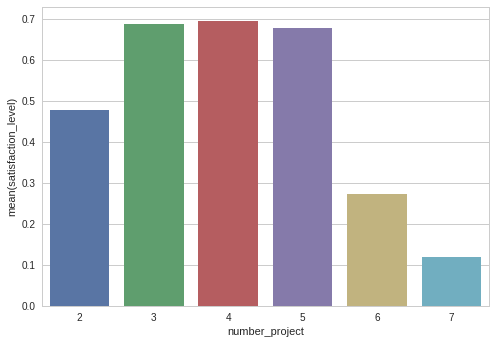

In [37]:
perc('number_project', 'satisfaction_level')

   time_spend_company  satisfaction_level
0                   2            0.697078
1                   3            0.626314
2                   4            0.467517
3                   5            0.610305
4                   6            0.603440
5                   7            0.635957
6                   8            0.665062
7                  10            0.655327


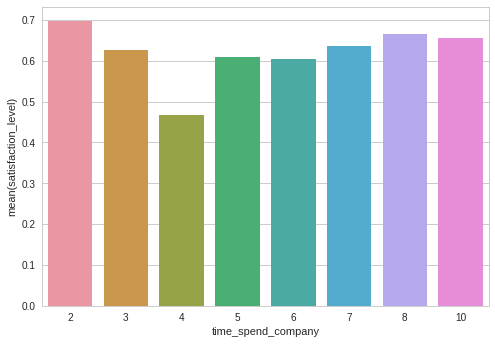

In [38]:
perc('time_spend_company', 'satisfaction_level')